# Regularization

We will use sklearn's `MLPClassifier` to explore the generalization gap and regularization.

## Imports

In [3]:
import os
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

%matplotlib inline

## Data set

We will use the artificial [moons data set](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) from sklearn.

In [4]:
# number of examples in the data set
n_examples = 1000
# fraction of the data set that goes into the valid set
valid_sz = 0.2

X, y = make_moons(n_samples=n_examples, noise=0.3, random_state=1)

# Train-valid split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=valid_sz, random_state=2)

## Network

In [5]:
# architecture
hidden_layers = (100, 400, 400, 100)
# L2 regularization parameter
alpha = 0.0
# Number of epochs per iteration in the training loop
max_iter = 2
# Number of training steps
n_train_steps = 400


# x-ticks for plotting
epochs = np.arange(1, n_train_steps + 1) * max_iter
# early stopping
early_stopping = False # 1, 3, 4, 5, 6*


# warm_start: when set to True, reuse the solution of the previous call to fit as initialization
# Once we initial the network, we can stop, look at the weights, and train from the previous weights

warm_start = True

clf = MLPClassifier(random_state=6, 
                    hidden_layer_sizes=hidden_layers, 
                    alpha=alpha, 
                    solver='adam',  # SDG with more bells and whistles
                    max_iter=max_iter, 
                    tol=0., 
                    early_stopping=early_stopping,
                    validation_fraction=0,
                    warm_start=warm_start)

# Initialize and track train and validation accuracy
train_acc, valid_acc = [], []

for i in range(n_train_steps):
    if (i % 40) == 0: 
      print(i, end='\n')
    else:
      print(i, end=' ')
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    valid_acc.append(clf.score(X_valid, y_valid))

0
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80
81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

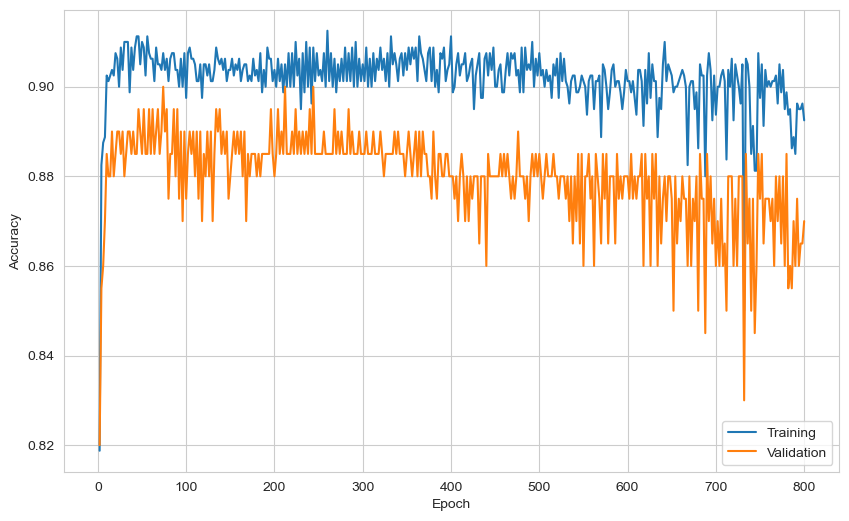

In [6]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(epochs, train_acc, label='Training')
ax.plot(epochs, valid_acc, label='Validation')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend()

In [7]:
# Why is it jagged here?
# Validation Set - the dataset is small, datapoint noisy
# Training set - more data, the effect of the noisy datapoint is lower


# Between 100-200, could you argue this is the number of epochs for training?
# often stopping, early stoppage, if after this point it decreases from X number of epoches
# default setting is around 75-80 epochs
# 200 epochs, then you can roll back to the better version

# Synthetic dataset

# Near the end of blue training set
# i.e. Gradient - learning rate - it would start bouncing around
# Something something like this going on, the learning rate
# Exploding gradient
# Average absolute weight is bigger here or not

In [8]:
# Images in 
# Epoch-2:
# If the perfect decision-boundary: red on this side, blue on this side
# Second Epoch, random initialized weights
# It starts to fit better, but around other epochs like around 800 epochs, it gets overfitted
# Decision Boundary becomes complicated

## Plotting to visualize the decision boundary

In [9]:
# the function making up the graph of a dataset
def make_plot(X, y, plot_name, fname=None, XX=None, YY=None, preds=None, dark=False):
    """
    """
    if dark:
        plt.style.use('dark_background')
    else:
        sns.set_style("whitegrid")
        
    plt.figure(figsize=(16,12))
    axes = plt.gca()
    axes.set(xlabel="$X_1$", ylabel="$X_2$")
    plt.title(plot_name, fontsize=30)
    plt.subplots_adjust(left=0.20)
    plt.subplots_adjust(right=0.80)
    
    if XX is not None and YY is not None and preds is not None:
        plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha=1, cmap=cm.Spectral)
        plt.contour(XX, YY, preds.reshape(XX.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)
        
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='none')
    
    if fname:
        plt.savefig(fname)
        plt.close()

    if dark:
        plt.style.use('default')
        sns.set_style("whitegrid")

# boundary of the graph
# GRID_X_START = -1.5
GRID_X_START, GRID_X_END = X[:, 0].min(), X[:, 0].max()
# GRID_X_END = 2.5
# GRID_Y_START = -1.0
GRID_Y_START, GRID_Y_END = X[:, 1].min(), X[:, 1].max()
# GRID_Y_END = 2
# output directory (the folder must be created in the current working directory)
OUTPUT_DIR = "./fig/"        
grid = np.mgrid[GRID_X_START:GRID_X_END:100j,GRID_Y_START:GRID_Y_END:100j]
grid_2d = grid.reshape(2, -1).T
XX, YY = grid        

In [10]:
if not os.path.isdir('fig'):
    os.mkdir('fig')

## Train a network and plot the desicion boundary

In [11]:
# architecture
hidden_layers = (100, 400, 400, 100)
# L2 regularization parameter
alpha = 0.0
# Number of epochs per iteration in the training loop
max_iter = 2
# Number of training steps
n_train_steps = 400
# x-ticks for plotting
epochs = np.arange(1, n_train_steps + 1) * max_iter
# early stopping
early_stopping = False # 1, 3, 4, 5, 6*
# warm_start: when set to True, reuse the solution of the previous call to fit as initialization
warm_start = True

clf = MLPClassifier(random_state=6, 
                    hidden_layer_sizes=hidden_layers, 
                    alpha=alpha, 
                    solver='adam', 
                    max_iter=max_iter, 
                    tol=0., 
                    early_stopping=early_stopping,
                    validation_fraction=0,
                    warm_start=warm_start)

train_acc, valid_acc = [], []

for i in range(n_train_steps):
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    valid_acc.append(clf.score(X_valid, y_valid))
    if not (i % 10):
        print(i, end=' ')
        pred_probs = clf.predict_proba(grid_2d)[:, 0]
        plot_title = 'epoch %d' % epochs[i]
        fname = "model_{:05}.png".format(epochs[i])
        fpath = os.path.join(OUTPUT_DIR, fname)
        make_plot(X_valid, y_valid, plot_title, fname=fpath, XX=XX, YY=YY, preds=pred_probs.T, dark=True)



0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 

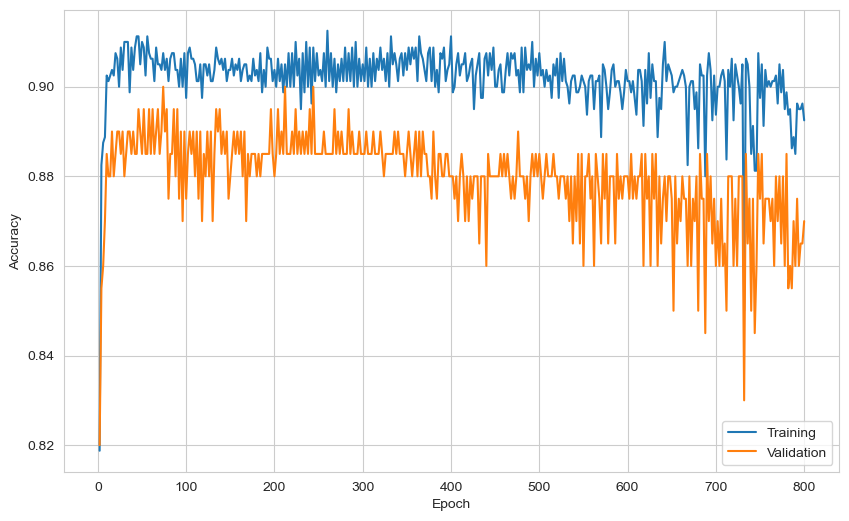

In [12]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(epochs, train_acc, label='Training')
ax.plot(epochs, valid_acc, label='Validation')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend()  

## Tasks

Decrease the generalization error in **four** different ways.

### Method 1

In [13]:
# L2 Regularization - use it here.

# architecture
hidden_layers = (100, 400, 400, 100)
# L2 regularization parameter
alpha = 0.2 # lambda - regularization parameter
# Number of epochs per iteration in the training loop
max_iter = 2
# Number of training steps
n_train_steps = 400
# x-ticks for plotting
epochs = np.arange(1, n_train_steps + 1) * max_iter
# early stopping
early_stopping = False # 1, 3, 4, 5, 6*
# warm_start: when set to True, reuse the solution of the previous call to fit as initialization
warm_start = True

clf = MLPClassifier(random_state=6, 
                    hidden_layer_sizes=hidden_layers, 
                    alpha=alpha, 
                    solver='adam', 
                    max_iter=max_iter, 
                    tol=0., 
                    early_stopping=early_stopping,
                    validation_fraction=0,
                    warm_start=warm_start)

train_acc, valid_acc = [], []

for i in range(n_train_steps):
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    valid_acc.append(clf.score(X_valid, y_valid))
    if not (i % 10):
        print(i, end=' ')
        pred_probs = clf.predict_proba(grid_2d)[:, 0]
        plot_title = 'epoch %d' % epochs[i]
        fname = "model_{:05}.png".format(epochs[i])
        fpath = os.path.join(OUTPUT_DIR, fname)
        make_plot(X_valid, y_valid, plot_title, fname=fpath, XX=XX, YY=YY, preds=pred_probs.T, dark=True)

0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 

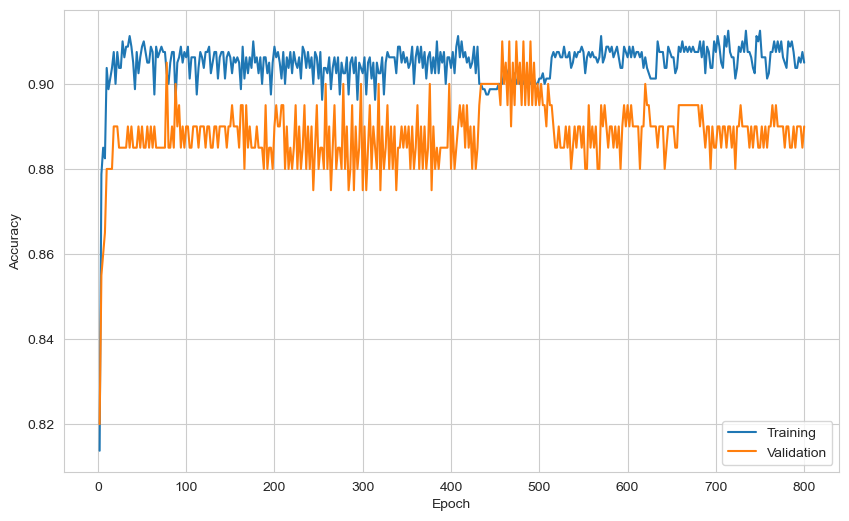

In [14]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(epochs, train_acc, label='Training')
ax.plot(epochs, valid_acc, label='Validation')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend()  

In [15]:
# L2 Regularization - use it here.

# architecture
hidden_layers = (100, 400, 400, 100)
# L2 regularization parameter
alpha = 0.4 # lambda - regularization parameter
# Number of epochs per iteration in the training loop
max_iter = 2
# Number of training steps
n_train_steps = 400
# x-ticks for plotting
epochs = np.arange(1, n_train_steps + 1) * max_iter
# early stopping
early_stopping = False # 1, 3, 4, 5, 6*
# warm_start: when set to True, reuse the solution of the previous call to fit as initialization
warm_start = True

clf = MLPClassifier(random_state=6, 
                    hidden_layer_sizes=hidden_layers, 
                    alpha=alpha, 
                    solver='adam', 
                    max_iter=max_iter, 
                    tol=0., 
                    early_stopping=early_stopping,
                    validation_fraction=0,
                    warm_start=warm_start)

train_acc, valid_acc = [], []

for i in range(n_train_steps):
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    valid_acc.append(clf.score(X_valid, y_valid))
    if not (i % 10):
        print(i, end=' ')
        pred_probs = clf.predict_proba(grid_2d)[:, 0]
        plot_title = 'epoch %d' % epochs[i]
        fname = "model_{:05}.png".format(epochs[i])
        fpath = os.path.join(OUTPUT_DIR, fname)
        make_plot(X_valid, y_valid, plot_title, fname=fpath, XX=XX, YY=YY, preds=pred_probs.T, dark=True)

0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 

In [16]:
# alpha of 0.4, penalize heavily for having high weights
# this is why the performance is not doing well.

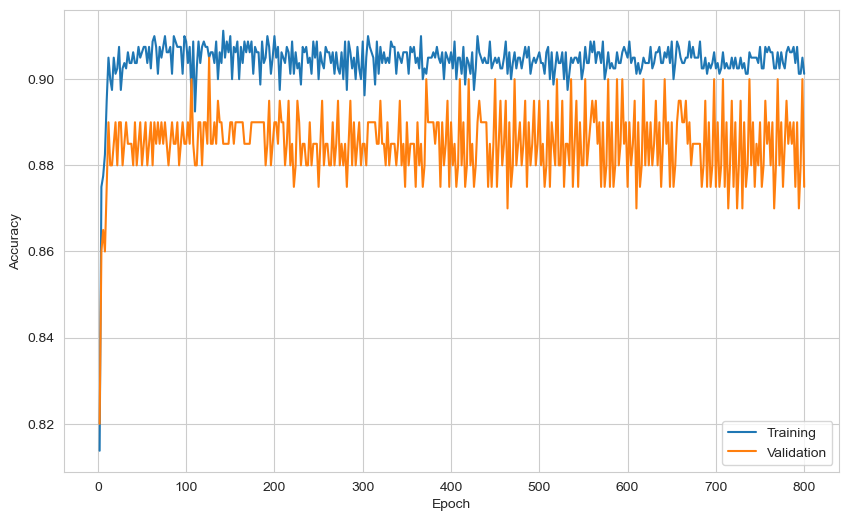

In [17]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(epochs, train_acc, label='Training')
ax.plot(epochs, valid_acc, label='Validation')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend()  

### Method 2

In [18]:
# Reduce model capacity - delete a layer

# architecture
# remove a layer

# hidden_layers = (100, 400, 400, 100)
# Cut layers and also the number of neurons per layer
hidden_layers = (10, 40, 40)
# L2 regularization parameter
alpha = 0.0
# Number of epochs per iteration in the training loop
max_iter = 2
# Number of training steps
n_train_steps = 400
# x-ticks for plotting
epochs = np.arange(1, n_train_steps + 1) * max_iter
# early stopping
early_stopping = False # 1, 3, 4, 5, 6*
# warm_start: when set to True, reuse the solution of the previous call to fit as initialization
warm_start = True

clf = MLPClassifier(random_state=6, 
                    hidden_layer_sizes=hidden_layers, 
                    alpha=alpha, 
                    solver='adam', 
                    max_iter=max_iter, 
                    tol=0., 
                    early_stopping=early_stopping,
                    validation_fraction=0,
                    warm_start=warm_start)

train_acc, valid_acc = [], []

for i in range(n_train_steps):
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    valid_acc.append(clf.score(X_valid, y_valid))
    if not (i % 10):
        print(i, end=' ')
        pred_probs = clf.predict_proba(grid_2d)[:, 0]
        plot_title = 'epoch %d' % epochs[i]
        fname = "model_{:05}.png".format(epochs[i])
        fpath = os.path.join(OUTPUT_DIR, fname)
        make_plot(X_valid, y_valid, plot_title, fname=fpath, XX=XX, YY=YY, preds=pred_probs.T, dark=True)



0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 

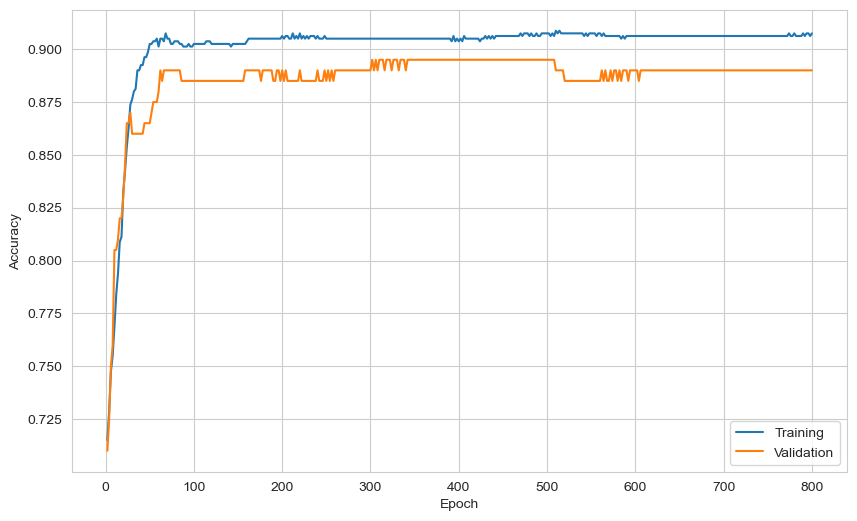

In [19]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(epochs, train_acc, label='Training')
ax.plot(epochs, valid_acc, label='Validation')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend()  

### Method 3

In [20]:
# Early Stoppage:

# architecture
hidden_layers = (100, 400, 400, 100)
# L2 regularization parameter
alpha = 0.4 # lambda - regularization parameter
# Number of epochs per iteration in the training loop
max_iter = 2
# Number of training steps
n_train_steps = 400
# x-ticks for plotting
epochs = np.arange(1, n_train_steps + 1) * max_iter
# early stopping
# early_stopping = True, 10% of training dataset is allocated, which is only 80 samples
#

early_stopping = True # 1, 3, 4, 5, 6*
# warm_start: when set to True, reuse the solution of the previous call to fit as initialization
warm_start = True

clf = MLPClassifier(random_state=6, 
                    hidden_layer_sizes=hidden_layers, 
                    alpha=alpha, 
                    solver='adam', 
                    max_iter=max_iter, 
                    tol=0., 
                    early_stopping=early_stopping,
                    validation_fraction=0.1, # Need for early stoppage - there is no validation data which we need for early stoppage
                    warm_start=warm_start)

train_acc, valid_acc = [], []

for i in range(n_train_steps):
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    valid_acc.append(clf.score(X_valid, y_valid))
    if not (i % 10):
        print(i, end=' ')
        pred_probs = clf.predict_proba(grid_2d)[:, 0]
        plot_title = 'epoch %d' % epochs[i]
        fname = "model_{:05}.png".format(epochs[i])
        fpath = os.path.join(OUTPUT_DIR, fname)
        make_plot(X_valid, y_valid, plot_title, fname=fpath, XX=XX, YY=YY, preds=pred_probs.T, dark=True)

0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 

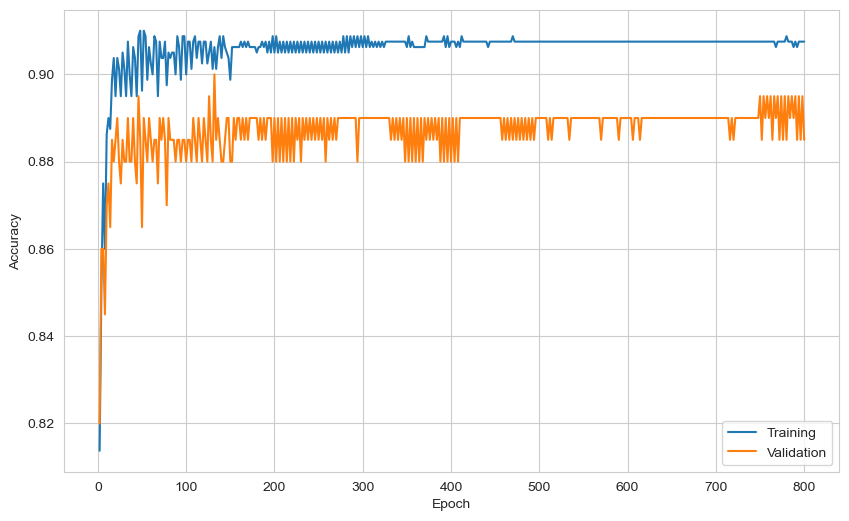

In [21]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(epochs, train_acc, label='Training')
ax.plot(epochs, valid_acc, label='Validation')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend()  

### Method 4

In [22]:
# Data Agumentation

# Add more data

# number of examples in the data set
n_examples = 2000
# fraction of the data set that goes into the valid set
valid_sz = 0.2

X, y = make_moons(n_samples=n_examples, noise=0.3, random_state=1)

# Train-valid split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=valid_sz, random_state=2)

In [23]:
# Data Augmentation:

# L2 Regularization - use it here.

# architecture
hidden_layers = (100, 400, 400, 100)
# L2 regularization parameter
alpha = 0.4 # lambda - regularization parameter
# Number of epochs per iteration in the training loop
max_iter = 2
# Number of training steps
n_train_steps = 400
# x-ticks for plotting
epochs = np.arange(1, n_train_steps + 1) * max_iter
# early stopping
early_stopping = False # 1, 3, 4, 5, 6*
# warm_start: when set to True, reuse the solution of the previous call to fit as initialization
warm_start = True

clf = MLPClassifier(random_state=6, 
                    hidden_layer_sizes=hidden_layers, 
                    alpha=alpha, 
                    solver='adam', 
                    max_iter=max_iter, 
                    tol=0., 
                    early_stopping=early_stopping,
                    validation_fraction=0,
                    warm_start=warm_start)

train_acc, valid_acc = [], []

for i in range(n_train_steps):
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    valid_acc.append(clf.score(X_valid, y_valid))
    if not (i % 10):
        print(i, end=' ')
        pred_probs = clf.predict_proba(grid_2d)[:, 0]
        plot_title = 'epoch %d' % epochs[i]
        fname = "model_{:05}.png".format(epochs[i])
        fpath = os.path.join(OUTPUT_DIR, fname)
        make_plot(X_valid, y_valid, plot_title, fname=fpath, XX=XX, YY=YY, preds=pred_probs.T, dark=True)

0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 

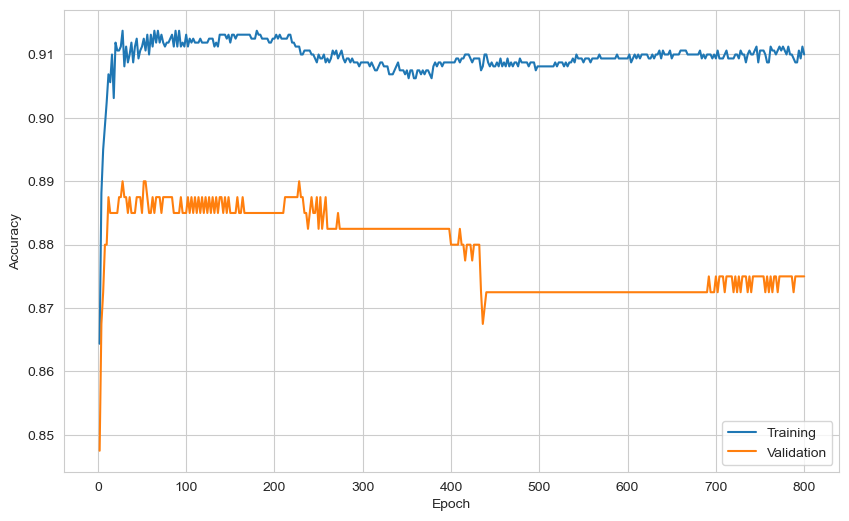

In [24]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(epochs, train_acc, label='Training')
ax.plot(epochs, valid_acc, label='Validation')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend()  

In [25]:
# Data Agugmentation:
# Validation error goes above 
# decrease parameters until you get a better accuracy


# IT DEPENDS